# Vishnuvarthan VK

## Hotel Reservation Cancellation Prediction

#### Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.

In [1]:
#importing the dataset
import pandas as pd

In [2]:
data=pd.read_csv('Hotel Reservations.csv')
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
#checking null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [4]:
#checking columns
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
#dropping unnecessary columns
data.drop(['Booking_ID','arrival_year', 'arrival_month'],axis=1,inplace=True)
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,21,Online,0,0,0,94.50,0,Canceled


In [6]:
#Mean of Booking status of each column
data.groupby('booking_status').mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24540\3576436070.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('booking_status').mean()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,
Canceled,1.909550,0.124358,0.887505,2.392259,0.009592,139.215482,15.730080,0.001346,0.005553,0.002188,110.589966,0.334623
Not_Canceled,1.813489,0.095982,0.773309,2.112710,0.041410,58.927224,15.532144,0.037474,0.032021,0.227101,99.931412,0.758549


<AxesSubplot:xlabel='booking_status', ylabel='count'>

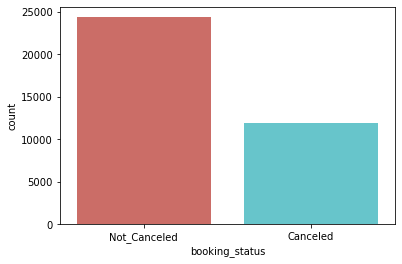

In [7]:
#Count of each booking status
import seaborn as sns
sns.countplot(x='booking_status', data = data, palette = 'hls')


In [8]:
#Label encoding the necessary columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["type_of_meal_plan"]=LE.fit_transform(data["type_of_meal_plan"])
data["room_type_reserved"]=LE.fit_transform(data["room_type_reserved"])
data["market_segment_type"]=LE.fit_transform(data["market_segment_type"])
data["booking_status"]=LE.fit_transform(data["booking_status"])
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,21,4,0,0,0,94.50,0,0


In [9]:
#Creating X,y dataframe
X=data.drop('booking_status',axis=1)
y=data[['booking_status']]

In [10]:
#splitting the dataset for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
29580,2,0,1,3,0,0,0,200,29,4,0,0,0,90.95,0
6325,2,0,1,3,0,0,0,79,24,4,0,0,0,90.95,1
33899,2,0,1,4,0,0,3,78,6,4,0,0,0,99.45,1
720,2,0,2,0,0,0,0,61,4,3,0,0,0,91.00,0
22120,2,1,0,4,0,0,0,201,1,4,0,0,0,82.28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,2,0,2,2,0,0,0,43,26,3,0,0,0,55.00,2
6265,1,0,0,2,1,0,0,102,16,4,0,0,0,80.00,0
11284,2,0,0,2,0,0,0,5,24,2,0,0,0,110.00,1
860,2,0,0,3,0,0,0,213,7,4,0,0,0,130.00,0


## Existing Method

In [11]:
#importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

In [12]:
#logistic regression with standard scaler and minmax scaler
LR=LogisticRegression(max_iter=100)
SS=StandardScaler()
MM=MinMaxScaler()
SS_X_train=SS.fit_transform(X_train)
SS_X_test=SS.transform(X_test)
MM_X_train=MM.fit_transform(X_train)
MM_X_test=MM.transform(X_test)

In [13]:
LR.fit(SS_X_train,y_train)
y_pred_SS=LR.predict(SS_X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
LR1=LogisticRegression(max_iter=100)
LR1.fit(MM_X_train,y_train)
y_pred_MM=LR1.predict(MM_X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
#Classification Report
print("LR using StandardScaler: \n",classification_report(y_test, y_pred_SS))
print("LR using MinMaxScaler: \n",classification_report(y_test, y_pred_MM))

LR using StandardScaler: 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67      3607
           1       0.82      0.90      0.86      7276

    accuracy                           0.80     10883
   macro avg       0.79      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883

LR using MinMaxScaler: 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67      3607
           1       0.82      0.90      0.86      7276

    accuracy                           0.80     10883
   macro avg       0.79      0.75      0.76     10883
weighted avg       0.80      0.80      0.79     10883



## Proposed Method

In [16]:
#XGB classifier
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
y_pred_XGB=XGB.predict(X_test)
y_pred_XGB

array([1, 1, 1, ..., 1, 0, 0])

In [17]:
accuracy_score(y_test,y_pred_XGB)

0.883304235964348

In [18]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=42)
RFC.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24540\2081281804.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred_RFC=RFC.predict(X_test)
y_pred_RFC

array([1, 1, 1, ..., 1, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred_RFC))
print(classification_report(y_test,y_pred_RFC))

0.8941468345125425
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3607
           1       0.90      0.94      0.92      7276

    accuracy                           0.89     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



In [21]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_pred_KNN=KNN.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [22]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      3607
           1       0.84      0.89      0.86      7276

    accuracy                           0.81     10883
   macro avg       0.79      0.77      0.78     10883
weighted avg       0.81      0.81      0.81     10883

